<a href="https://colab.research.google.com/github/MartinSantaGitHub/python-ml-course/blob/master/code/T11%20-%203%20-%20Reconocimiento%20de%20texto%20escrito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# **El dataset de MNIST**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from skimage import io
from IPython.display import display, Math

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
len(mnist.train.images)

55000

In [5]:
len(mnist.test.images)

10000

In [6]:
im_temp = mnist.train.images[0]
im_temp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

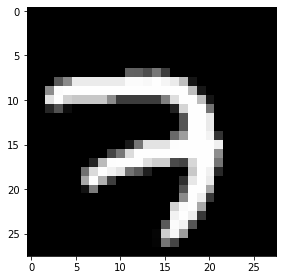

In [7]:
io.imshow(np.reshape(im_temp,(28,28)))

In [8]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# **Una red neuronal con Tensor Flow - v1**
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del dataset es un número real entre 0 y 1.

y = softmax(W * x + b)

In [10]:
dim_input = 784
n_categories = 10

In [11]:
x = tf.placeholder(tf.float32,[None,dim_input])

In [12]:
W = tf.Variable(tf.zeros([dim_input,n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

In [13]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

#### **Entrenando la red neuronal**
* Loss / Cost <- objetivo minimizar las pérdidas

In [15]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [16]:
y_ = tf.placeholder(tf.float32,[None,10])

In [17]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat),reduction_indices=[1]))

In [18]:
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [19]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [20]:
session = tf.InteractiveSession()

In [21]:
tf.global_variables_initializer().run()

In [27]:
for _ in range(10000):
  batch_x, batch_y = mnist.train.next_batch(150)
  session.run(train_step,feed_dict={x:batch_x,y_:batch_y})

#### **Evaluando la red neuronal**

In [28]:
correct_predictions = tf.equal(tf.argmax(y_hat,1),tf.argmax(y_,1))

In [29]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [30]:
print(session.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9253
